# Stock Market Prediction of NiftyIT 225 companies using Machine Learning Techniques

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [302]:
data=pd.read_csv("NiftyIT.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,06/28/2024,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,0.09%
1,06/27/2024,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,2.03%
2,06/26/2024,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,-0.06%
3,06/25/2024,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,0.81%
4,06/24/2024,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,-0.16%
...,...,...,...,...,...,...,...
4076,01/07/2008,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,-2.86%
4077,01/04/2008,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,-0.53%
4078,01/03/2008,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,-2.24%
4079,01/02/2008,"4,722.50","4,747.40","4,765.15","4,659.40",8.14M,-0.54%


In [303]:
data.shape

(4081, 7)

In [304]:
data=data.drop(columns=['Date'])
data

,Price,Open,High,Low,Vol.,Change %
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,0.09%
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,2.03%
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,-0.06%
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,0.81%
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,-0.16%
...,...,...,...,...,...,...
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,-2.86%
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,-0.53%
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,-2.24%
4079,"4,722.50","4,747.40","4,765.15","4,659.40",8.14M,-0.54%


In [305]:
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,4081,4081,4081,4081,4072,4081
unique,4053,4053,4045,4044,2813,744
top,"10,929.90","11,096.40","7,380.10","11,093.60",15.26M,0.17%
freq,2,2,2,2,6,24


In [306]:
data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        9
Change %    0
dtype: int64

In [307]:
df=data.dropna()
df

,Price,Open,High,Low,Vol.,Change %
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,0.09%
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,2.03%
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,-0.06%
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,0.81%
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,-0.16%
...,...,...,...,...,...,...
4075,"4,506.35","4,473.95","4,522.45","4,437.65",10.00M,1.02%
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,-2.86%
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,-0.53%
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,-2.24%


In [308]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4072 entries, 0 to 4079
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     4072 non-null   object
 1   Open      4072 non-null   object
 2   High      4072 non-null   object
 3   Low       4072 non-null   object
 4   Vol.      4072 non-null   object
 5   Change %  4072 non-null   object
dtypes: object(6)
memory usage: 222.7+ KB


In [310]:
df.drop(columns=['Change %'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\1658844372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Change %'],inplace=True)


,Price,Open,High,Low,Vol.
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M
...,...,...,...,...,...
4075,"4,506.35","4,473.95","4,522.45","4,437.65",10.00M
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M


In [311]:
df.sample(10)

,Price,Open,High,Low,Vol.
2272,"11,132.25","11,474.40","11,523.00","11,077.30",32.05M
3978,"4,574.20","4,699.65","4,773.65","4,532.15",14.81M
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M
2086,"10,934.70","10,957.95","10,994.90","10,893.35",10.56K
2883,"6,087.85","6,053.50","6,095.90","6,053.50",8.63M
2143,"11,548.15","11,644.05","11,644.05","11,523.95",15.02M
1614,"11,315.20","11,211.80","11,345.40","11,096.60",13.46K
2383,"11,421.30","11,428.40","11,508.75","11,406.75",11.01M
3461,"6,185.65","6,129.30","6,196.40","6,128.65",23.21M
628,"36,160.30","36,078.30","36,354.85","35,979.15",18.93M


In [312]:
def convert_vol(vol):
    if 'K' in vol:
        return float(vol.replace('K', ''))
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1000
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1000000
    else:
        return float(vol)/1000

def convert_to_num(dt):
    if ',' in dt:
        return float(dt.replace(',',''))
    else:
        return float(dt)

In [313]:
df['Volume(K)']=df['Vol.'].apply(convert_vol)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\3236443624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume(K)']=df['Vol.'].apply(convert_vol)


,Price,Open,High,Low,Vol.,Volume(K)
0,"36,157.50","36,154.20","36,334.65","36,041.20",29.24M,29240.0
1,"36,123.70","35,289.25","36,191.20","35,105.70",54.77M,54770.0
2,"35,406.60","35,484.05","35,593.95","35,336.00",18.20M,18200.0
3,"35,426.90","35,146.65","35,468.00","35,004.85",15.98M,15980.0
4,"35,143.80","35,067.75","35,282.00","34,918.15",18.07M,18070.0
...,...,...,...,...,...,...
4075,"4,506.35","4,473.95","4,522.45","4,437.65",10.00M,10000.0
4076,"4,460.95","4,580.05","4,580.05","4,453.55",11.26M,11260.0
4077,"4,592.50","4,616.35","4,654.25","4,581.45",9.17M,9170.0
4078,"4,616.85","4,679.90","4,704.60","4,602.45",12.94M,12940.0


In [314]:
df['Price']=df['Price'].apply(convert_to_num)
df['Open']=df['Open'].apply(convert_to_num)
df['High']=df['High'].apply(convert_to_num)
df['Low']=df['Low'].apply(convert_to_num)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\1879019303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\1879019303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open']=df['Open'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\1879019303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Price,Open,High,Low,Vol.,Volume(K)
0,36157.50,36154.20,36334.65,36041.20,29.24M,29240.0
1,36123.70,35289.25,36191.20,35105.70,54.77M,54770.0
2,35406.60,35484.05,35593.95,35336.00,18.20M,18200.0
3,35426.90,35146.65,35468.00,35004.85,15.98M,15980.0
4,35143.80,35067.75,35282.00,34918.15,18.07M,18070.0
...,...,...,...,...,...,...
4075,4506.35,4473.95,4522.45,4437.65,10.00M,10000.0
4076,4460.95,4580.05,4580.05,4453.55,11.26M,11260.0
4077,4592.50,4616.35,4654.25,4581.45,9.17M,9170.0
4078,4616.85,4679.90,4704.60,4602.45,12.94M,12940.0


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4072 entries, 0 to 4079
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4072 non-null   float64
 1   Open       4072 non-null   float64
 2   High       4072 non-null   float64
 3   Low        4072 non-null   float64
 4   Vol.       4072 non-null   object 
 5   Volume(K)  4072 non-null   float64
dtypes: float64(5), object(1)
memory usage: 222.7+ KB


In [316]:
df.drop(columns=['Vol.'], inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\1067798956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Vol.'], inplace=True)


,Price,Open,High,Low,Volume(K)
0,36157.50,36154.20,36334.65,36041.20,29240.0
1,36123.70,35289.25,36191.20,35105.70,54770.0
2,35406.60,35484.05,35593.95,35336.00,18200.0
3,35426.90,35146.65,35468.00,35004.85,15980.0
4,35143.80,35067.75,35282.00,34918.15,18070.0
...,...,...,...,...,...
4075,4506.35,4473.95,4522.45,4437.65,10000.0
4076,4460.95,4580.05,4580.05,4453.55,11260.0
4077,4592.50,4616.35,4654.25,4581.45,9170.0
4078,4616.85,4679.90,4704.60,4602.45,12940.0


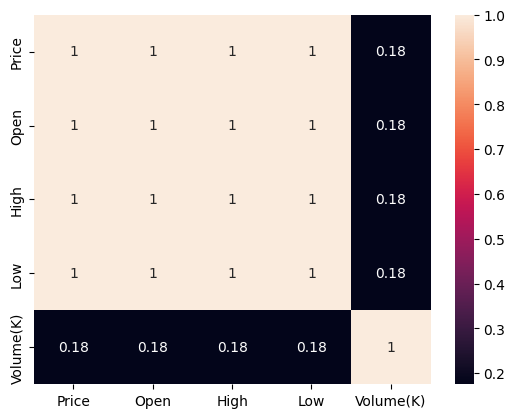

In [317]:
sns.heatmap(df.corr(),annot=True)
plt.show()

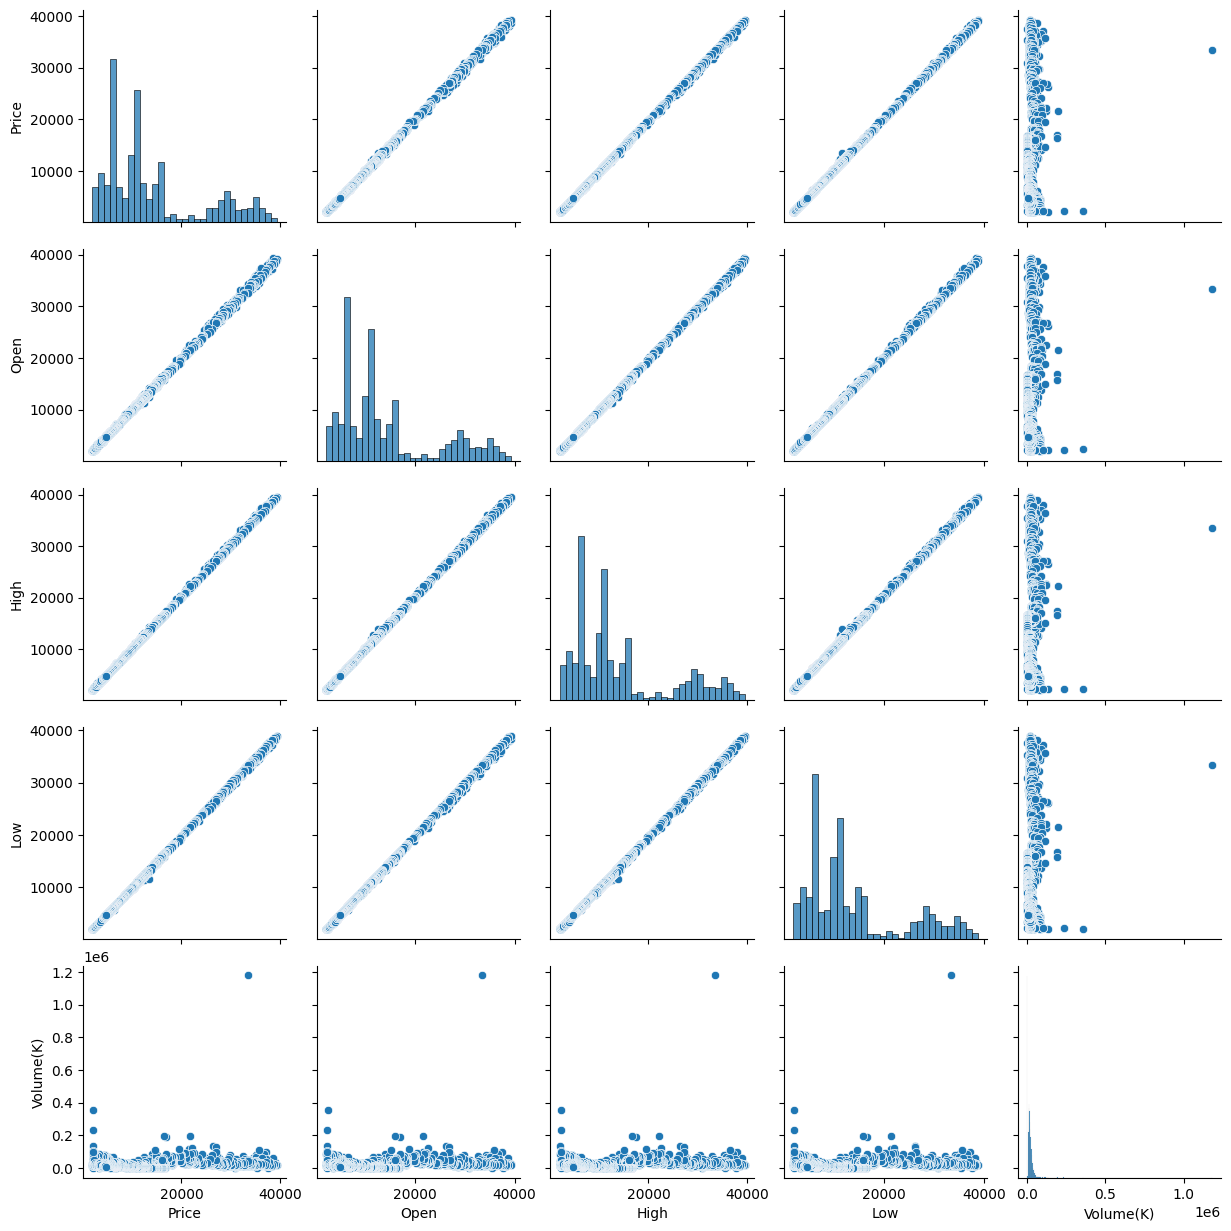

In [318]:
sns.pairplot(df,kind='scatter')
plt.show()

## Simple Linear Regression

## Taking Open as independent feature and close as dependent fearture

<function matplotlib.pyplot.show(close=None, block=None)>

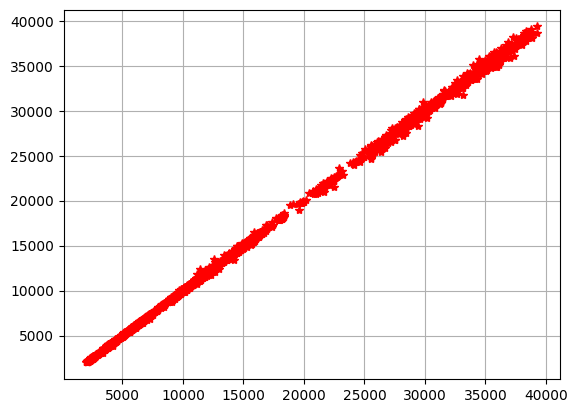

In [319]:
plt.plot(df['Open'],df['Price'],'r*')
plt.grid(True)
plt.show

In [320]:
X=df[['Open']]
X

,Open
0,36154.20
1,35289.25
2,35484.05
3,35146.65
4,35067.75
...,...
4075,4473.95
4076,4580.05
4077,4616.35
4078,4679.90


In [321]:
y=df['Price']
y

0       36157.50
1       36123.70
2       35406.60
3       35426.90
4       35143.80
          ...   
4075     4506.35
4076     4460.95
4077     4592.50
4078     4616.85
4079     4722.50
Name: Price, Length: 4072, dtype: float64

In [322]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [323]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [324]:
lr.fit(X_train,y_train)

LinearRegression()

In [325]:
print(f"Coefficient : {lr.coef_}\nintercept : {lr.intercept_}")

Coefficient : [0.99907248]
intercept : 7.096642933858675


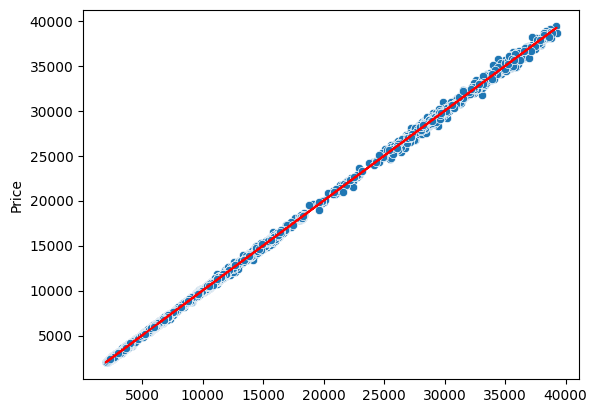

In [326]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),color='red')
plt.show()

In [327]:
pred=lr.predict(X_test)

In [328]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [329]:
import math
def find_RMSE(pred,actual):
    return math.sqrt(mean_squared_error(actual,pred))

def find_adj_r2(pred,actual):
    return 1-((1-r2_score(pred,actual))*(len(actual)-1)/(len(actual)-X_train.shape[1]-1))

In [330]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 131.7261245717371
MSE : 48402.06818135775
RMSE : 220.0047003619644
R2 : 0.9995454150527316
Adj R2 : 0.9995448022550116


In [331]:
lr_mae=mean_absolute_error(y_test,pred)
lr_rmse=find_RMSE(pred,y_test)
lr_r2=r2_score(y_test,pred)

In [332]:
dt={
    'Simple_LinearReg' : [mean_absolute_error(y_test,pred)]}
mean_abs_err=pd.DataFrame(dt)
mean_abs_err

,Simple_LinearReg
0,131.726125


In [333]:
dt={
    'Simple_LinearReg' : [find_RMSE(pred,y_test)]
}
root_mean_sq_err=pd.DataFrame(dt)
root_mean_sq_err

,Simple_LinearReg
0,220.0047


In [334]:
dt={
    'Simple_LinearReg' : [r2_score(y_test,pred)]
}
R2_score=pd.DataFrame(dt)
R2_score

,Simple_LinearReg
0,0.999545


## Ridge Regression

In [335]:
from sklearn.linear_model import Ridge

In [336]:
rr=Ridge(alpha=0.1)

In [337]:
rr.fit(X_train,y_train)

Ridge(alpha=0.1)

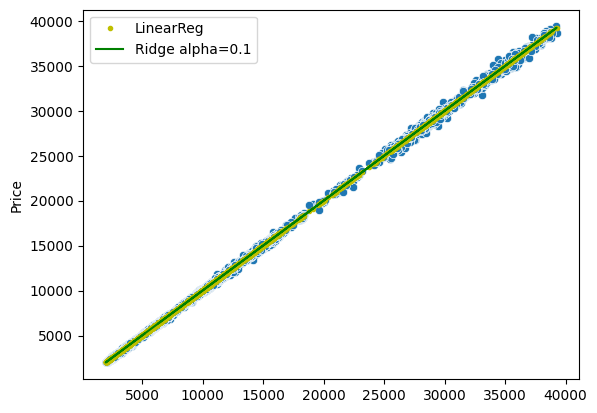

In [338]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'y.',label='LinearReg')
plt.plot(X_val,rr.predict(X_train),color='green',label='Ridge alpha=0.1')
plt.legend()
plt.show()

In [339]:
print(rr.coef_,rr.intercept_)

[0.99907248] 7.096642937858633


In [340]:
y_pred=rr.predict(X_test)

In [341]:
print(f"MAE : {mean_absolute_error(y_test,y_pred)}\nMSE : {mean_squared_error(y_test,y_pred)}\nRMSE : {find_RMSE(y_pred,y_test)}\nR2 : {r2_score(y_test,y_pred)}\nAdj R2 : {find_adj_r2(y_pred,y_test)}")

MAE : 131.72612457169132
MSE : 48402.06818130999
RMSE : 220.00470036185587
R2 : 0.9995454150527321
Adj R2 : 0.9995448022550119


In [342]:
rr_mae=mean_absolute_error(y_test,y_pred)
rr_rmse=find_RMSE(y_pred,y_test)
rr_r2=r2_score(y_test,y_pred)

In [343]:
mean_abs_err['Ridge_alpha_0.1']=[mean_absolute_error(y_test,y_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1
0,131.726125,131.726125


In [344]:
root_mean_sq_err['Ridge_alpha_0.1']=[find_RMSE(y_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1
0,220.0047,220.0047


In [345]:
R2_score['Ridge_alpha_0.1']=[r2_score(y_test,y_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1
0,0.999545,0.999545


## Lasso Regression

In [346]:
from sklearn.linear_model import Lasso

In [347]:
lsr=Lasso(alpha=0.1)

In [348]:
lsr.fit(X_train,y_train)

Lasso(alpha=0.1)

In [349]:
print(lsr.coef_,lsr.intercept_)

[0.99907248] 7.0966576383470965


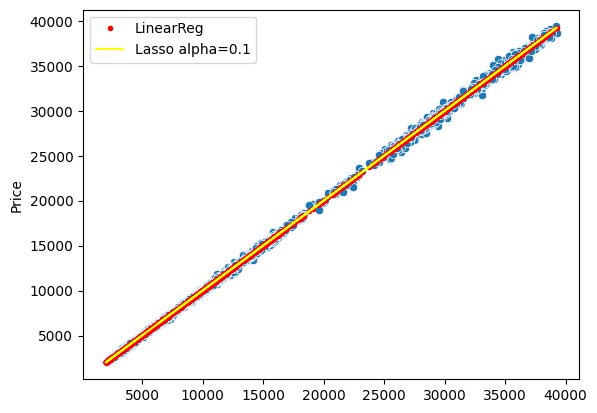

In [350]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'r.',label='LinearReg')
plt.plot(X_val,lsr.predict(X_train),color='yellow',label='Lasso alpha=0.1')
plt.legend()
plt.show()

In [351]:
yl_pred=lsr.predict(X_test)

In [352]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 131.7261244039763
MSE : 48402.06800630713
RMSE : 220.0046999641306
R2 : 0.9995454150543757
Adj R2 : 0.9995448022557015


In [353]:
lsr_mae=mean_absolute_error(y_test,yl_pred)
lsr_rmse=find_RMSE(yl_pred,y_test)
lsr_r2=r2_score(y_test,yl_pred)

In [354]:
mean_abs_err['Lasso_alpha_0.1']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,131.726125,131.726125,131.726124


In [355]:
root_mean_sq_err['Lasso_alpha_0.1']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,220.0047,220.0047,220.0047


In [356]:
R2_score['Lasso_alpha_0.1']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,0.999545,0.999545,0.999545


## Polynomial Regression

In [357]:
from sklearn.preprocessing import PolynomialFeatures

In [358]:
poly=PolynomialFeatures(degree=4)

In [359]:
X_poly = poly.fit_transform(X_train)
X_test1=poly.transform(X_test)
poly.fit(X_poly,y_train)
lin=LinearRegression()
lin.fit(X_poly,y_train)

LinearRegression()

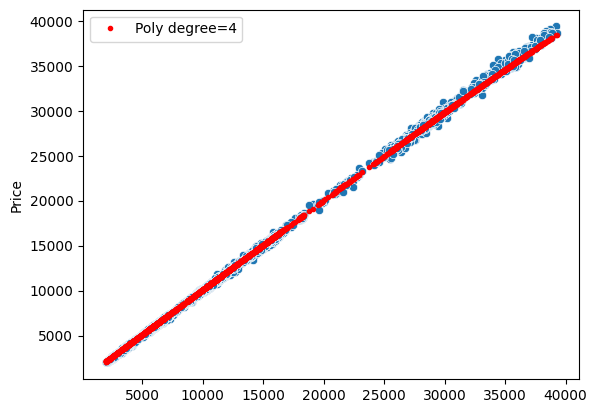

In [360]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'r.',label='Poly degree=4')
plt.legend()
plt.show()

In [361]:
yp_pred=lin.predict(X_test1)

In [362]:
print(f"MAE : {mean_absolute_error(y_test,yp_pred)}\nMSE : {mean_squared_error(y_test,yp_pred)}\nRMSE : {find_RMSE(yp_pred,y_test)}\nR2 : {r2_score(y_test,yp_pred)}\nAdj R2 : {find_adj_r2(yp_pred,y_test)}")

MAE : 169.27650944545414
MSE : 71182.423526045
RMSE : 266.800343939143
R2 : 0.9993314653802855
Adj R2 : 0.9993113693698754


In [363]:
poly_mae=mean_absolute_error(y_test,yp_pred)
poly_rmse=find_RMSE(yp_pred,y_test)
poly_r2=r2_score(y_test,yp_pred)

In [364]:
mean_abs_err['Poly_deg_4']=[mean_absolute_error(y_test,yp_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,131.726125,131.726125,131.726124,169.276509


In [365]:
root_mean_sq_err['Poly_deg_4']=[find_RMSE(yp_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,220.0047,220.0047,220.0047,266.800344


In [366]:
R2_score['Poly_deg_4']=r2_score(y_test,yp_pred)
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,0.999545,0.999545,0.999545,0.999331


## Ridge on Polynomial Regression

In [367]:
ridp=Ridge(alpha=0.1)
ridp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.25126e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

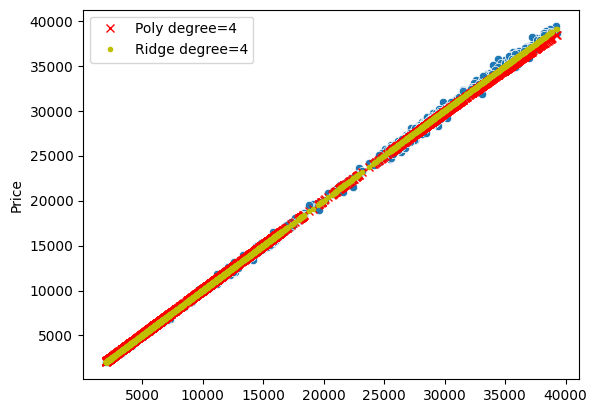

In [368]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'rx',label='Poly degree=4')
plt.plot(X_val,ridp.predict(X_poly),'y.',label='Ridge degree=4')
plt.legend()
plt.show()

In [369]:
yr_pred=ridp.predict(X_test1)

In [370]:
print(f"MAE : {mean_absolute_error(y_test,yr_pred)}\nMSE : {mean_squared_error(y_test,yr_pred)}\nRMSE : {find_RMSE(yr_pred,y_test)}\nR2 : {r2_score(y_test,yr_pred)}\nAdj R2 : {find_adj_r2(yr_pred,y_test)}")

MAE : 131.65912679843282
MSE : 48401.705127264526
RMSE : 220.00387525510664
R2 : 0.9995454184624811
Adj R2 : 0.9995448696860454


In [371]:
prr_mae=mean_absolute_error(y_test,yr_pred)
prr_rmse=find_RMSE(yr_pred,y_test)
prr_r2=r2_score(y_test,yr_pred)

In [372]:
mean_abs_err['Ridge_0.1_Poly_4']=[mean_absolute_error(y_test,yr_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,131.726125,131.726125,131.726124,169.276509,131.659127


In [373]:
root_mean_sq_err['Ridge_0.1_Poly_4']=[find_RMSE(yr_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,220.0047,220.0047,220.0047,266.800344,220.003875


In [374]:
R2_score['Ridge_0.1_Poly_4']=[r2_score(y_test,yr_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,0.999545,0.999545,0.999545,0.999331,0.999545


## Lasso on polynomial of degree 4

In [375]:
lsp=Lasso(alpha=0.1)
lsp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.156e+07, tolerance: 3.486e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

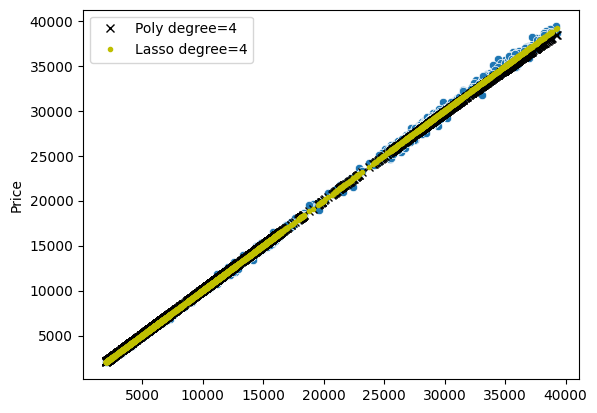

In [376]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'kx',label='Poly degree=4')
plt.plot(X_val,lsp.predict(X_poly),'y.',label='Lasso degree=4')
plt.legend()
plt.show()

In [377]:
yl_pred=lsp.predict(X_test1)

In [378]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 131.95544519327046
MSE : 48506.196012779794
RMSE : 220.24122232856362
R2 : 0.9995444370997942
Adj R2 : 0.9995438446552257


In [379]:
plsr_mae=mean_absolute_error(y_test,yl_pred)
plsr_rmse=find_RMSE(yl_pred,y_test)
plsr_r2=r2_score(y_test,yl_pred)

In [380]:
mean_abs_err['Lasso_0.1_Poly_4']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,131.726125,131.726125,131.726124,169.276509,131.659127,131.955445


In [381]:
root_mean_sq_err['Lasso_0.1_Poly_4']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,220.0047,220.0047,220.0047,266.800344,220.003875,220.241222


In [382]:
R2_score['Lasso_0.1_Poly_4']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,0.999545,0.999545,0.999545,0.999331,0.999545,0.999544


## Multiple Linear Regression

In [383]:
df

,Price,Open,High,Low,Volume(K)
0,36157.50,36154.20,36334.65,36041.20,29240.0
1,36123.70,35289.25,36191.20,35105.70,54770.0
2,35406.60,35484.05,35593.95,35336.00,18200.0
3,35426.90,35146.65,35468.00,35004.85,15980.0
4,35143.80,35067.75,35282.00,34918.15,18070.0
...,...,...,...,...,...
4075,4506.35,4473.95,4522.45,4437.65,10000.0
4076,4460.95,4580.05,4580.05,4453.55,11260.0
4077,4592.50,4616.35,4654.25,4581.45,9170.0
4078,4616.85,4679.90,4704.60,4602.45,12940.0


In [384]:
df.drop(columns=['High','Low'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\4086614560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['High','Low'],inplace=True)


,Price,Open,Volume(K)
0,36157.50,36154.20,29240.0
1,36123.70,35289.25,54770.0
2,35406.60,35484.05,18200.0
3,35426.90,35146.65,15980.0
4,35143.80,35067.75,18070.0
...,...,...,...
4075,4506.35,4473.95,10000.0
4076,4460.95,4580.05,11260.0
4077,4592.50,4616.35,9170.0
4078,4616.85,4679.90,12940.0


In [385]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K)
0,36154.20,29240.0
1,35289.25,54770.0
2,35484.05,18200.0
3,35146.65,15980.0
4,35067.75,18070.0
...,...,...
4075,4473.95,10000.0
4076,4580.05,11260.0
4077,4616.35,9170.0
4078,4679.90,12940.0


In [386]:
y=df['Price']
y

0       36157.50
1       36123.70
2       35406.60
3       35426.90
4       35143.80
          ...   
4075     4506.35
4076     4460.95
4077     4592.50
4078     4616.85
4079     4722.50
Name: Price, Length: 4072, dtype: float64

In [387]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [388]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [389]:
cdf=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf

,coef_lin
Open,0.998953
Volume(K),0.000257


In [390]:
mlin.intercept_

4.226552846046616

In [391]:
pred=mlin.predict(X_test)

In [392]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 132.10219048248445
MSE : 48349.99310660263
RMSE : 219.88631859804883
R2 : 0.9995459041340045
Adj R2 : 0.9995441474261498


In [393]:
mlr_mae=mean_absolute_error(y_test,pred)
mlr_rmse=find_RMSE(pred,y_test)
mlr_r2=r2_score(y_test,pred)

In [394]:
mean_abs_err['Mul_LinearReg']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,131.726125,131.726125,131.726124,169.276509,131.659127,131.955445,132.10219


In [395]:
root_mean_sq_err['Mul_LinearReg'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,220.0047,220.0047,220.0047,266.800344,220.003875,220.241222,219.886319


In [396]:
R2_score['Mul_LinearReg']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,0.999545,0.999545,0.999545,0.999331,0.999545,0.999544,0.999546


## Applying Ridge Regression on Multiple Linear Regression

In [397]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [398]:
cdf['coef_ridge']=ridm.coef_
cdf

,coef_lin,coef_ridge
Open,0.998953,0.998953
Volume(K),0.000257,0.000257


In [399]:
ridm.intercept_

4.226552849821019

In [400]:
pred=ridm.predict(X_test)

In [401]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 132.10219048245654
MSE : 48349.99310655486
RMSE : 219.8863185979402
R2 : 0.9995459041340049
Adj R2 : 0.9995441474261499


In [402]:
mrr_mae=mean_absolute_error(y_test,pred)
mrr_rmse=find_RMSE(pred,y_test)
mrr_r2=r2_score(y_test,pred)

In [403]:
mean_abs_err['Mul_Ridge_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,131.726125,131.726125,131.726124,169.276509,131.659127,131.955445,132.10219,132.10219


In [404]:
root_mean_sq_err['Mul_Ridge_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,220.0047,220.0047,220.0047,266.800344,220.003875,220.241222,219.886319,219.886319


In [405]:
R2_score['Mul_Ridge_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,0.999545,0.999545,0.999545,0.999331,0.999545,0.999544,0.999546,0.999546


## Applying Lasso Regression on Multiple Linear Regression

In [406]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [407]:
cdf['coef_lasso']=lso.coef_
cdf

,coef_lin,coef_ridge,coef_lasso
Open,0.998953,0.998953,0.998953
Volume(K),0.000257,0.000257,0.000257


In [408]:
lso.intercept_

4.226522245724482

In [409]:
pred=lso.predict(X_test)

In [410]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 132.10219047945608
MSE : 48349.99352886155
RMSE : 219.88631955822433
R2 : 0.9995459041300386
Adj R2 : 0.9995441474244269


In [411]:
mlsr_mae=mean_absolute_error(y_test,pred)
mlsr_rmse=find_RMSE(pred,y_test)
mlsr_r2=r2_score(y_test,pred)

In [412]:
mean_abs_err['Mul_Lasso_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,131.726125,131.726125,131.726124,169.276509,131.659127,131.955445,132.10219,132.10219,132.10219


In [413]:
root_mean_sq_err['Mul_Lasso_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,220.0047,220.0047,220.0047,266.800344,220.003875,220.241222,219.886319,219.886319,219.88632


In [414]:
R2_score['Mul_Lasso_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,0.999545,0.999545,0.999545,0.999331,0.999545,0.999544,0.999546,0.999546,0.999546


## adding more features

In [415]:
df

,Price,Open,Volume(K)
0,36157.50,36154.20,29240.0
1,36123.70,35289.25,54770.0
2,35406.60,35484.05,18200.0
3,35426.90,35146.65,15980.0
4,35143.80,35067.75,18070.0
...,...,...,...
4075,4506.35,4473.95,10000.0
4076,4460.95,4580.05,11260.0
4077,4592.50,4616.35,9170.0
4078,4616.85,4679.90,12940.0


In [416]:
df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\2831065476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\2831065476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg
0,36157.50,36154.20,29240.0,35485.035714
1,36123.70,35289.25,54770.0,35485.035714
2,35406.60,35484.05,18200.0,35485.035714
3,35426.90,35146.65,15980.0,35485.035714
4,35143.80,35067.75,18070.0,35485.035714
...,...,...,...,...
4075,4506.35,4473.95,10000.0,4358.407143
4076,4460.95,4580.05,11260.0,4399.500000
4077,4592.50,4616.35,9170.0,4456.228571
4078,4616.85,4679.90,12940.0,4506.042857


In [417]:
df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\1927853552.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\1927853552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg,14DaysMavg
0,36157.50,36154.20,29240.0,35485.035714,35087.932143
1,36123.70,35289.25,54770.0,35485.035714,35087.932143
2,35406.60,35484.05,18200.0,35485.035714,35087.932143
3,35426.90,35146.65,15980.0,35485.035714,35087.932143
4,35143.80,35067.75,18070.0,35485.035714,35087.932143
...,...,...,...,...,...
4075,4506.35,4473.95,10000.0,4358.407143,4115.260714
4076,4460.95,4580.05,11260.0,4399.500000,4151.889286
4077,4592.50,4616.35,9170.0,4456.228571,4213.778571
4078,4616.85,4679.90,12940.0,4506.042857,4270.710714


In [418]:
delta=df['Price'].diff()
gain=delta.where(delta>0,0)
loss=delta.where(delta<0,0)
avg_gain=gain.rolling(window=14).mean()
avg_loss=loss.rolling(window=14).mean()
rs=avg_gain/avg_loss
df['RSI']=100-(100/(1+rs))
df['RSI'].fillna(method='bfill',inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\3173424381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI']=100-(100/(1+rs))
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_16060\3173424381.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RSI']

,Price,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,36157.50,36154.20,29240.0,35485.035714,35087.932143,-23.313410
1,36123.70,35289.25,54770.0,35485.035714,35087.932143,-23.313410
2,35406.60,35484.05,18200.0,35485.035714,35087.932143,-23.313410
3,35426.90,35146.65,15980.0,35485.035714,35087.932143,-23.313410
4,35143.80,35067.75,18070.0,35485.035714,35087.932143,-23.313410
...,...,...,...,...,...,...
4075,4506.35,4473.95,10000.0,4358.407143,4115.260714,162.096088
4076,4460.95,4580.05,11260.0,4399.500000,4151.889286,194.296022
4077,4592.50,4616.35,9170.0,4456.228571,4213.778571,130.174851
4078,4616.85,4679.90,12940.0,4506.042857,4270.710714,132.802208


<Axes: >

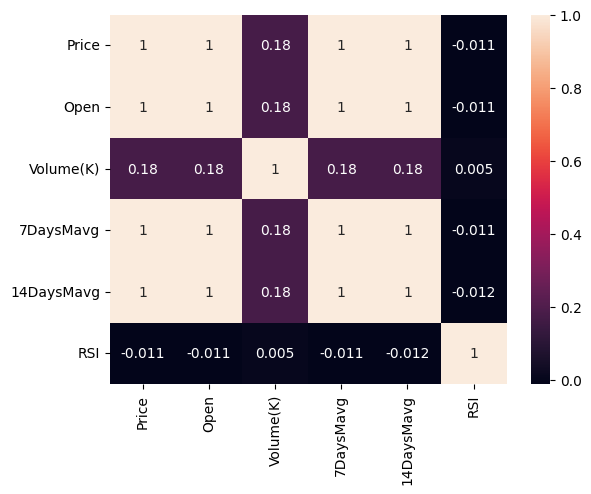

In [419]:
sns.heatmap(df.corr(),annot=True)

In [420]:
X=df.drop(columns='Price')
X

,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,36154.20,29240.0,35485.035714,35087.932143,-23.313410
1,35289.25,54770.0,35485.035714,35087.932143,-23.313410
2,35484.05,18200.0,35485.035714,35087.932143,-23.313410
3,35146.65,15980.0,35485.035714,35087.932143,-23.313410
4,35067.75,18070.0,35485.035714,35087.932143,-23.313410
...,...,...,...,...,...
4075,4473.95,10000.0,4358.407143,4115.260714,162.096088
4076,4580.05,11260.0,4399.500000,4151.889286,194.296022
4077,4616.35,9170.0,4456.228571,4213.778571,130.174851
4078,4679.90,12940.0,4506.042857,4270.710714,132.802208


In [421]:
y=df['Price']
y

0       36157.50
1       36123.70
2       35406.60
3       35426.90
4       35143.80
          ...   
4075     4506.35
4076     4460.95
4077     4592.50
4078     4616.85
4079     4722.50
Name: Price, Length: 4072, dtype: float64

In [422]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [423]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [424]:
cdf1=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf1

,coef_lin
Open,0.706144
Volume(K),0.000078
7DaysMavg,0.440154
14DaysMavg,-0.147077
RSI,-0.000115


In [425]:
mlin.intercept_

2.7277888589433132

In [426]:
pred=mlin.predict(X_test)

In [427]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 116.35294639911054
MSE : 37072.574694558694
RMSE : 192.54239713517305
R2 : 0.9996518199522078
Adj R2 : 0.9996477950512124


In [428]:
mean_abs_err['Mul_LinearReg+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,131.726125,131.726125,131.726124,169.276509,131.659127,131.955445,132.10219,132.10219,132.10219,116.352946


In [429]:
root_mean_sq_err['Mul_LinearReg+'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,220.0047,220.0047,220.0047,266.800344,220.003875,220.241222,219.886319,219.886319,219.88632,192.542397


In [430]:
R2_score['Mul_LinearReg+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,0.999545,0.999545,0.999545,0.999331,0.999545,0.999544,0.999546,0.999546,0.999546,0.999652


## Ridge

In [431]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [432]:
cdf1['coef_ridge']=ridm.coef_
cdf1

,coef_lin,coef_ridge
Open,0.706144,0.706144
Volume(K),0.000078,0.000078
7DaysMavg,0.440154,0.440154
14DaysMavg,-0.147077,-0.147077
RSI,-0.000115,-0.000115


In [433]:
ridm.intercept_

2.7277888573989912

In [434]:
pred=ridm.predict(X_test)

In [435]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 116.35294639703869
MSE : 37072.574694200244
RMSE : 192.5423971342422
R2 : 0.9996518199522111
Adj R2 : 0.9996477950512149


In [436]:
mean_abs_err['Mul_Ridge_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,131.726125,131.726125,131.726124,169.276509,131.659127,131.955445,132.10219,132.10219,132.10219,116.352946,116.352946


In [437]:
root_mean_sq_err['Mul_Ridge_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,220.0047,220.0047,220.0047,266.800344,220.003875,220.241222,219.886319,219.886319,219.88632,192.542397,192.542397


In [438]:
R2_score['Mul_Ridge_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,0.999545,0.999545,0.999545,0.999331,0.999545,0.999544,0.999546,0.999546,0.999546,0.999652,0.999652


## Lasso

In [439]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.684e+07, tolerance: 3.486e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [440]:
cdf1['coef_lasso']=lso.coef_
cdf1

,coef_lin,coef_ridge,coef_lasso
Open,0.706144,0.706144,0.822061
Volume(K),0.000078,0.000078,0.000145
7DaysMavg,0.440154,0.440154,0.206736
14DaysMavg,-0.147077,-0.147077,-0.029648
RSI,-0.000115,-0.000115,-0.000082


In [441]:
lso.intercept_

1.2278170652843983

In [442]:
pred=lso.predict(X_test)

In [443]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 119.06189247508632
MSE : 39053.69254325533
RMSE : 197.62007120547077
R2 : 0.9996332135912274
Adj R2 : 0.9996289085861216


In [444]:
mean_abs_err['Mul_Lasso_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,131.726125,131.726125,131.726124,169.276509,131.659127,131.955445,132.10219,132.10219,132.10219,116.352946,116.352946,119.061892


In [445]:
root_mean_sq_err['Mul_Lasso_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,220.0047,220.0047,220.0047,266.800344,220.003875,220.241222,219.886319,219.886319,219.88632,192.542397,192.542397,197.620071


In [446]:
R2_score['Mul_Lasso_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,0.999545,0.999545,0.999545,0.999331,0.999545,0.999544,0.999546,0.999546,0.999546,0.999652,0.999652,0.999633
